# IRIS - Connection I
---
![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=2023)

In [7]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

## **length끼리, width끼리**

In [8]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [9]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [10]:
tr_x_l.shape, tr_x_w.shape

((135, 2), (135, 2))

In [12]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [15]:
train_y.shape

(135, 3)

## Modeling : multi-input & Concatenate layer

In [16]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [18]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

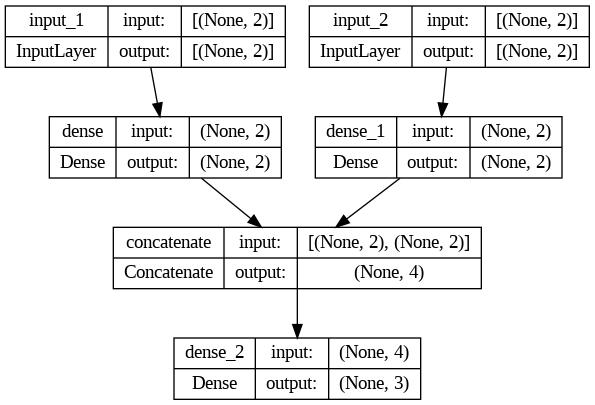

In [19]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [20]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

In [21]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 103ms/step - loss: 1.3315 - accuracy: 0.5000 - val_loss: 1.4295 - val_accuracy: 0.3333
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.3136 - accuracy: 0.4825 - val_loss: 1.4109 - val_accuracy: 0.3333
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.2972 - accuracy: 0.4649 - val_loss: 1.3924 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.2807 - accuracy: 0.4474 - val_loss: 1.3744 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.2654 - accuracy: 0.4298 - val_loss: 1.3564 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.2495 - accuracy: 0.4211 - val_loss: 1.3390 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.2344 - accuracy: 0.4123 - val_loss: 1.3221 - val_accuracy: 0.3333
Epoch 8/1000

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [22]:
iris = load_iris()

x = iris.data
y = iris.target

In [23]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [27]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((135, 4), (15, 4), (135,), (15,))

## **length끼리, width끼리**

In [ ]:
df_x_train = pd.DataFrame

In [29]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)']]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]

te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)']]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)']]

tr_x_l.shape, tr_x_w.shape, te_x_l.shape, te_x_w.shape

((135, 2), (135, 2), (15, 2), (15, 2))

## One-hot Encoding

In [31]:
from tensorflow.keras.utils import to_categorical

In [30]:
np.unique(y)

array([0, 1, 2])

In [32]:
class_n = len(np.unique(y))

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)
train_y.shape, test_y.shape

((135, 3), (15, 3))

## Modeling : multi-input & Concatenate layer

In [40]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 엮기
il_l = keras.layers.Input(shape=(2, ))
hl_l = keras.layers.Dense(2, activation='relu')(il_l)

il_w = keras.layers.Input(shape=(2, ))
hl_w = keras.layers.Dense(2, activation='relu')(il_w)

cl = keras.layers.Concatenate()([hl_l, hl_w])
ol = keras.layers.Dense(3, activation='softmax')(cl)

# 3. 모델 선언
model = keras.models.Model([il_l, il_w], ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

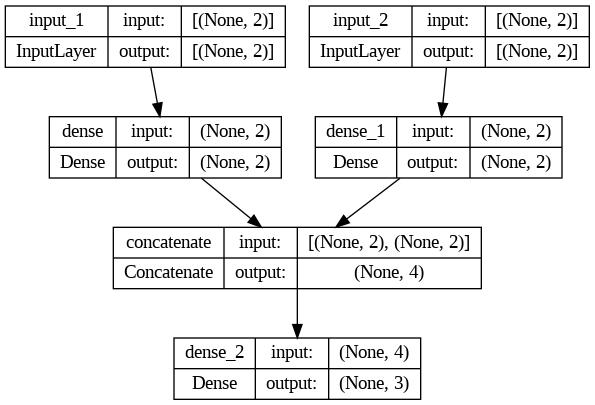

In [41]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

In [44]:
history = model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.1, epochs=1000, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 93ms/step - loss: 3.9494 - accuracy: 0.3471 - val_loss: 4.7146 - val_accuracy: 0.2143
Epoch 2/1000
4/4 [==============================] - 0s 21ms/step - loss: 3.8428 - accuracy: 0.3471 - val_loss: 4.5896 - val_accuracy: 0.2143
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.7420 - accuracy: 0.3471 - val_loss: 4.4647 - val_accuracy: 0.2143
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 3.6390 - accuracy: 0.3471 - val_loss: 4.3403 - val_accuracy: 0.2143
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.5355 - accuracy: 0.3471 - val_loss: 4.2170 - val_accuracy: 0.2143
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.4362 - accuracy: 0.3471 - val_loss: 4.0942 - val_accuracy: 0.2143
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 3.3325 - accuracy: 0.3471 - val_loss: 3.9734 - val_accuracy: 0.2143
Epoch 8/1000


In [45]:
model.evaluate([te_x_l, te_x_w], test_y)

1/1 [==============================] - 0s 30ms/step - loss: 0.2349 - accuracy: 0.9333


[0.23490871489048004, 0.9333333373069763]

In [46]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 엮기
il_l = keras.layers.Input(shape=(2, ))
hl_l = keras.layers.Dense(4, activation='relu')(il_l)

il_w = keras.layers.Input(shape=(2, ))
hl_w = keras.layers.Dense(4, activation='relu')(il_w)

cl = keras.layers.Concatenate()([hl_l, hl_w])
ol = keras.layers.Dense(3, activation='softmax')(cl)

# 3. 모델 선언
model = keras.models.Model([il_l, il_w], ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

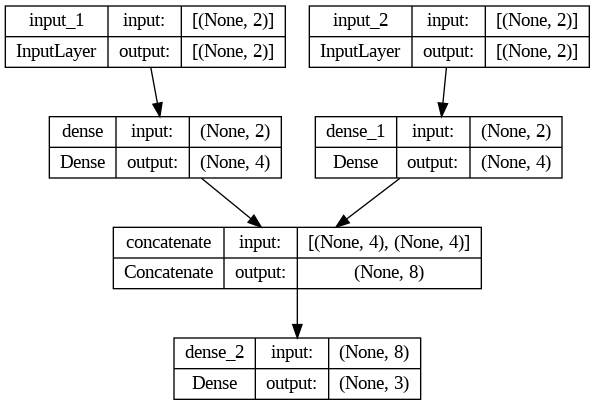

In [47]:
plot_model(model, show_shapes=True)

In [48]:
history = model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.1, epochs=1000, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 85ms/step - loss: 1.2240 - accuracy: 0.3471 - val_loss: 1.2791 - val_accuracy: 0.2143
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.2093 - accuracy: 0.3471 - val_loss: 1.2581 - val_accuracy: 0.2143
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1940 - accuracy: 0.3471 - val_loss: 1.2402 - val_accuracy: 0.2143
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.1843 - accuracy: 0.3471 - val_loss: 1.2228 - val_accuracy: 0.2143
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.1743 - accuracy: 0.3471 - val_loss: 1.2066 - val_accuracy: 0.2143
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.1640 - accuracy: 0.3471 - val_loss: 1.1923 - val_accuracy: 0.2143
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1580 - accuracy: 0.3471 - val_loss: 1.1785 - val_accuracy: 0.2143
Epoch 8/1000


In [49]:
model.evaluate([te_x_l, te_x_w], test_y)

1/1 [==============================] - 0s 31ms/step - loss: 0.1371 - accuracy: 1.0000


[0.1371287703514099, 1.0]

--------------

In [60]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((135, 4), (15, 4), (135,), (15,))

In [61]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)
train_y.shape, test_y.shape

((135, 3), (15, 3))

In [66]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 엮기
il = keras.layers.Input(shape=(4, ))

hl_1 = keras.layers.Dense(4, activation='relu')(il)
hl_2 = keras.layers.Dense(4, activation='relu')(il)

cl = keras.layers.Concatenate()([hl_1, hl_2])
hl = keras.layers.Dense(64, activation='relu')(cl)

ol = keras.layers.Dense(3, activation='softmax')(hl)

# 3. 모델 선언
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            20          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            20          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 8)            0           ['dense[0][0]',                  
                                                                  'dense_1[0][0]']            

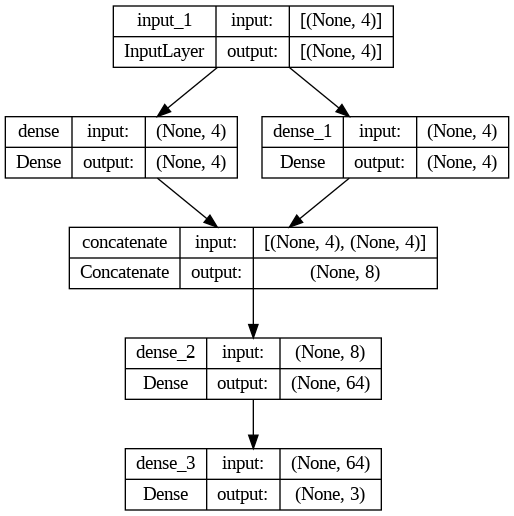

In [67]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [68]:
history = model.fit(train_x, train_y, validation_split=0.1, epochs=1000, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 89ms/step - loss: 1.1803 - accuracy: 0.3306 - val_loss: 1.0021 - val_accuracy: 0.4286
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0944 - accuracy: 0.3306 - val_loss: 0.9595 - val_accuracy: 0.4286
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0419 - accuracy: 0.3306 - val_loss: 0.9429 - val_accuracy: 0.4286
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0195 - accuracy: 0.3306 - val_loss: 0.9365 - val_accuracy: 0.4286
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.9958 - accuracy: 0.3306 - val_loss: 0.9266 - val_accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9728 - accuracy: 0.3554 - val_loss: 0.9091 - val_accuracy: 0.4286
Epoch 7/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.9450 - accuracy: 0.3388 - val_loss: 0.8880 - val_accuracy: 0.4286
Epoch 8/1000


In [69]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 41ms/step - loss: 0.0759 - accuracy: 1.0000


[0.07590283453464508, 1.0]